# Homework 2 - Berkeley STAT 157


In [3]:
import urllib
import torch
from torch import nn, autograd

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `torch.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `torch.rand` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [2]:
def sampler(probs, shape):
    ## Add your codes here
    return torch.zeros(shape)

# a simple test
sampler(torch.Tensor([0.2, 0.3, 0.5]), (2,3))


[[0. 0. 0.]
 [0. 0. 0.]]
<NDArray 2x3 @cpu(0)>

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words. (Hint, check the last page of the [sampling notebook](http://courses.d2l.ai/berkeley-stat-157/slides/1_24/sampling.pdf))
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

﻿
Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the u


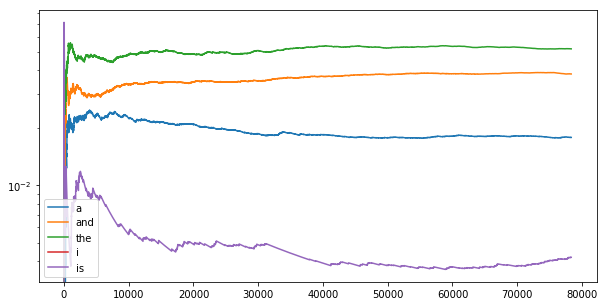

In [14]:
filename = '84-0.txt'
urllib.request.urlretrieve('https://www.gutenberg.org/files/84/84-0.txt', filename)
with open(filename) as f:
    book = f.read()
print(book[0:100])

## Add your codes here
import re
import matplotlib.pyplot as plt
word_count = {
    'a': [0], 'and': [0],
    'the': [0], 'i': [0],
    'is': [0]
}
book = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+', ' ', book)
for i, word in enumerate(re.split(r'[;,\s]\s*', book)):
    for key in word_count:
        if key == word:
            word_count[key].append(word_count[key][-1] + 1)
        else:
            word_count[key].append(word_count[key][-1])

for key in word_count:
    word_count[key] = [word_count[key][i] / (i + 1) for i in range(len(word_count[key]))]
y = list(range(len(word_count['a'])))
plt.figure(figsize=(10,5))
for key in word_count:
    plt.semilogy(y, word_count[key], label=key)
plt.legend()
plt.show()

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

1. $$\frac{\partial y}{\partial x} = \frac{\partial f}{\partial u} \frac{\partial u}{\partial x}$$

2. $$z=(Xw-y)^T(Xw-y)=(w^TX^T-y^T)(Xw-y)=w^TX^TXw-w^TX^Ty-y^TXw-y^Ty$$
$$\frac{\partial z}{\partial w} = 2x^T(Xw-y)$$

## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$.

In [29]:
def log_exp(x, y):
    ## add your solution here
    return -torch.log(torch.exp(x) / (torch.exp(x) + torch.exp(y)))

Test your codes with normal inputs:

In [30]:
x, y = torch.Tensor([2]), torch.Tensor([3])
z = log_exp(x, y)
z

tensor([1.3133])

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [31]:
def grad(forward_func, x, y): 
    ## Add your codes here
    x.grad = -torch.exp(-forward_func(y, x))
    y.grad = torch.exp(-forward_func(y, x))
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [32]:
grad(log_exp, x, y)

x.grad = tensor([-0.7311])
y.grad = tensor([0.7311])


But now let's try some "hard" inputs

In [33]:
x, y = torch.Tensor([50]), torch.Tensor([100])
grad(log_exp, x, y)

x.grad = tensor([nan])
y.grad = tensor([nan])


Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

In [34]:
def stable_log_exp(x, y):
    ## Add your codes here
    F = -max(x, y)
    return -torch.log(torch.exp(x+F) / (torch.exp(x+F) + torch.exp(y+F)))

grad(stable_log_exp, x, y)

x.grad = tensor([-1.])
y.grad = tensor([1.])
